<a href="https://colab.research.google.com/github/LIvanoff/ropsppr/blob/main/pr1_ropsppr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анамнестические методы рекомендательных систем

Создать программную реализацию анамнестическогометодарекомендательной системы (РС), основанной либо насоседствепользователей, либо на соседстве элементов (предметов), включающую:
  - актуальную предметную область для применения РС(вродемаркетплейса, медиа ресурсов, соц. сетей, экономической сферыит.д.);
  - математические меры сходств: расстояние Жаккара, нормулебеговапространства (Lp-норму), коэффициент Отиаи, коэффициент корреляцииПирсона и т.п. (см. Примечание 1), необходимо реализовать неменее3-ёхлюбых методов (пояснить, почему были выбраны именно этиметоды);
  - сравнение вышеописанных методов и, исходя из результатов, выборнаиболее подходящего(-их) метода(-ов) для решения задачи

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = {'Ivanov':[1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
        'Kleyzer':[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1],
        'Aypova': [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        'Astanin': [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        'Karpov': [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        'Zaytsev': [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        'Maslov': [1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        'Sorokin': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        'Avalishvili': [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
        'Boriskin': [1, 0, 0,	0,	0,	0,	0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        'Belyaev': [0,	0,	0, 0,	0,	0,	0,	1,	1,	0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        'Everstov': [1, 1,	0,	0,	0, 1,	0,	0,	1,	0,	0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1],
        'Mochalov': [1,	0,	0,	0,	0, 0,	1,	0,	0,	0,	0,	0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
        'Lekur': [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        'Kulikov': [0,	0,	1,	0,	1,	0,	1,	0,	0,	0,	1,	0,	1,	0, 1, 0, 0, 0, 0, 0, 0],
        'Garin': [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1],
        'Petrosyan': [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1],
        'Gurov': [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1],
        'Litwinov': [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
        'Novikova': [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1],
        'Korostylev': [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1]
        }

df = pd.DataFrame(data, index =['Ivanov', 'Kleyzer', 'Aypova', 'Astanin', 'Karpov', 'Zaytsev', 'Maslov', 'Sorokin',
                                'Avalishvili', 'Boriskin', 'Belyaev', 'Everstov', 'Mochalov', 'Lekur', 'Kulikov',
                                'Garin', 'Petrosyan', 'Gurov', 'Litwinov', 'Novikova', 'Korostylev'])

group_labels = [0,0,1,2,1,2,1,3,3,2,3,0,4,2,1,0,0,5,4,0,0]
for i in range(len(group_labels)):
  if group_labels[i] == 0:
    group_labels[i] = 'ikbo-15'
  elif group_labels[i] == 1:
    group_labels[i] = 'ikbo-04'
  elif group_labels[i] == 2:
    group_labels[i] = 'ikbo-14'
  elif group_labels[i] == 3:
    group_labels[i] = 'ikbo-22'
  elif group_labels[i] == 4:
    group_labels[i] = 'ikbo-05'
  elif group_labels[i] == 5:
    group_labels[i] = 'ikbo-24'


In [ ]:
df

,Ivanov,Kleyzer,Aypova,Astanin,Karpov,Zaytsev,Maslov,Sorokin,Avalishvili,Boriskin,...,Everstov,Mochalov,Lekur,Kulikov,Garin,Petrosyan,Gurov,Litwinov,Novikova,Korostylev
Ivanov,1,1,0,0,0,0,1,0,1,1,...,1,1,0,0,1,1,1,1,1,1
Kleyzer,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,1,0,1,1
Aypova,0,0,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Astanin,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Karpov,0,0,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Zaytsev,0,0,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Maslov,1,0,1,0,1,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Sorokin,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Avalishvili,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
Boriskin,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


## Косинусная близость

In [ ]:
def cosine_sim(a: str, b: str, df: pd.core.frame.DataFrame):
  a_emb = df[a].to_numpy()
  b_emb = df[b].to_numpy()
  return np.dot(a_emb, b_emb) / (np.linalg.norm(a_emb) * np.linalg.norm(b_emb))

In [ ]:
cosine_sim('Novikova', 'Astanin', df)

0.4364357804719848

In [ ]:
def cosine_sim_emb(a_emb: np.array, b_emb: np.array, df: pd.core.frame.DataFrame):
  return np.dot(a_emb, b_emb) / (np.linalg.norm(a_emb) * np.linalg.norm(b_emb))

def most_sim(df: pd.core.frame.DataFrame, positive: list = [], negative: list = []):
  if len(positive) != 0:
    emb = df[positive[0]].to_numpy()
    for i in range(1, len(positive)):
      pos_emb = df[positive[i]].to_numpy()
      emb = np.logical_or(emb, pos_emb).astype(int)
    if len(negative) != 0:
      for column in negative:
        neg_emb = df[column].to_numpy()
        emb = np.logical_xor(emb, neg_emb).astype(int)
  else:
    emb = df[negative[0]].to_numpy()
    for i in range(1, len(negative)):
      neg_emb = df[negative[i]].to_numpy()
      emb = np.logical_xor(emb, neg_emb).astype(int)
  cos_list = {}
  for column in df.columns:
    if column in positive or column in negative:
      pass
    else:
      sec_emb = df[column].to_numpy()
      cos_list[column] = cosine_sim_emb(emb, sec_emb, df)

  cos_list = {k: cos_list[k] for k in sorted(cos_list, key=cos_list.get, reverse=True)}

  return cos_list

In [ ]:
most_sim(negative=['Kleyzer'], positive=['Ivanov','Aypova'], df=df.copy())

{'Kulikov': 0.7216878364870323,
 'Karpov': 0.7071067811865475,
 'Maslov': 0.6681531047810609,
 'Mochalov': 0.6324555320336759,
 'Belyaev': 0.31622776601683794,
 'Litwinov': 0.31622776601683794,
 'Avalishvili': 0.2886751345948129,
 'Petrosyan': 0.2357022603955158,
 'Everstov': 0.22360679774997896,
 'Zaytsev': 0.20412414523193148,
 'Boriskin': 0.17677669529663687,
 'Gurov': 0.13363062095621217,
 'Korostylev': 0.1178511301977579,
 'Astanin': 0.0,
 'Sorokin': 0.0,
 'Lekur': 0.0,
 'Garin': 0.0,
 'Novikova': 0.0}

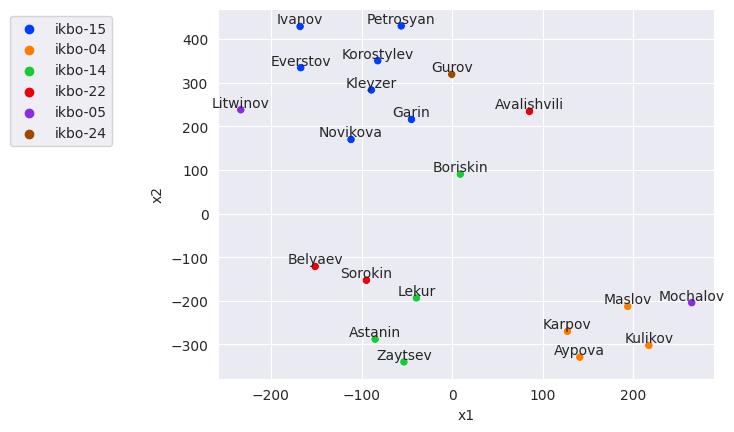

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

model = TSNE(n_components=2, perplexity=6, random_state=42)
TSNE_features = model.fit_transform(df)

DATA = df.copy()
DATA['x1'] = TSNE_features[:,0]
DATA['x2'] = TSNE_features[:,1]
# fig = plt.figure()
sns.set_style("darkgrid")
sns.scatterplot(x='x1', y='x2', hue=group_labels ,data=DATA, palette='bright')

for (xi, yi, zi) in zip(DATA['x1'], DATA['x2'], df.index):
    plt.text(xi, yi, zi, va='bottom', ha='center')

plt.legend(bbox_to_anchor=(-0.2, 1))
plt.show()

In [ ]:
!pip install timm

In [ ]:
import torch.onnx

In [ ]:
!pip install onnx

In [ ]:
import onnx

In [ ]:
import timm
model = timm.create_model('hrnet_w18', pretrained=True)
model

from sklearn.datasets import load_iris
import torch
import torchvision
import torchvision.transforms as transforms

dummy_input = torch.randn(10, 3, 384, 288)

torch.onnx.export(model, dummy_input, 'iris.onnx', input_names=["features"], output_names=["logits"])

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



## Манхэттенское расстояние

In [ ]:
def l1_metric(a: str, b: str, df: pd.core.frame.DataFrame):
  a_emb = df[a].to_numpy()
  b_emb = df[b].to_numpy()
  return np.sum(abs(a_emb - b_emb))

In [ ]:
l1_metric('Ivanov', 'Garin', df)

8

## Евклидово расстояние

In [ ]:
def l2_metric(a: str, b: str, df: pd.core.frame.DataFrame):
  a_emb = df[a].to_numpy()
  b_emb = df[b].to_numpy()
  return np.sqrt(np.sum(np.power((a_emb - b_emb), 2)))

In [ ]:
l2_metric('Ivanov', 'Garin', df)

2.8284271247461903

## Расстояние Жаккара

In [ ]:
def jaccard(a: str, b: str, df: pd.core.frame.DataFrame):
  a_emb = df[a].to_numpy()
  b_emb = df[b].to_numpy()
  mask = []
  for i in range(len(a_emb)):
    if a_emb[i] == b_emb[i]:
      mask.append(1)
  return sum(mask) / len(a_emb)

In [ ]:
jaccard('Ivanov', 'Kleyzer', df)

0.7333333333333333

In [ ]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

class SOMNetwork():
  def __init__(self, input_dim, dim=10, sigma=None, learning_rate=0.1, tay2=1000, dtype=tf.float32):
      #если сигма на определена устанавливаем ее равной половине размера решетки
      if not sigma:
          sigma = dim / 2
      self.dtype = dtype
      #определяем константы использующиеся при обучении
      self.dim = tf.constant(dim, dtype=tf.int64)
      self.learning_rate = tf.constant(learning_rate, dtype=dtype, name='learning_rate')
      self.sigma = tf.constant(sigma, dtype=dtype, name='sigma')
      #тау 1 (формула 6)
      self.tay1 = tf.constant(1000/np.log(sigma), dtype=dtype, name='tay1')
      #минимальное значение сигма на шаге 1000 (определяем по формуле 3)
      self.minsigma = tf.constant(sigma * np.exp(-1000/(1000/np.log(sigma))), dtype=dtype, name='min_sigma')
      self.tay2 = tf.constant(tay2, dtype=dtype, name='tay2')
      #input vector
      self.x = tf.placeholder(shape=[input_dim], dtype=dtype, name='input')
      #iteration number
      self.n = tf.placeholder(dtype=dtype, name='iteration')
      #матрица синаптических весов
      self.w = tf.Variable(tf.random_uniform([dim*dim, input_dim], minval=-1, maxval=1, dtype=dtype),
          dtype=dtype, name='weights')
      #матрица позиций всех нейронов, для определения латерального расстояния
      self.positions = tf.where(tf.fill([dim, dim], True))

  def __competition(self, info=''):
    with tf.name_scope(info+'competition') as scope:
        #вычисляем минимум евклидова расстояния для всей сетки нейронов
        distance = tf.sqrt(tf.reduce_sum(tf.square(self.x - self.w), axis=1))
    #возвращаем индекс победившего нейрона (формула 1)
    return tf.argmin(distance, axis=0)

  def training_op(self):
    #определяем индекс победившего нейрона
    win_index = self.__competition('train_')
    with tf.name_scope('cooperation') as scope:
      #вычисляем латеральное расстояние d
      #для этого переводим инедкс победившего нейрона из 1d координаты в 2d координату
      coop_dist = tf.sqrt(tf.reduce_sum(tf.square(tf.cast(self.positions -
          [win_index//self.dim, win_index-win_index//self.dim*self.dim],
          dtype=self.dtype)), axis=1))
      #корректируем сигма (используя формулу 3)
      sigma = tf.cond(self.n > 1000, lambda: self.minsigma, lambda: self.sigma * tf.exp(-self.n/self.tay1))
      #вычисляем топологическую окрестность (формула 2)
      tnh = tf.exp(-tf.square(coop_dist) / (2 * tf.square(sigma)))
    with tf.name_scope('adaptation') as scope:
      #обновляем параметр скорости обучения (формула 5)
      lr = self.learning_rate * tf.exp(-self.n/self.tay2)
      minlr = tf.constant(0.01, dtype=self.dtype, name='min_learning_rate')
      lr = tf.cond(lr <= minlr, lambda: minlr, lambda: lr)
      #вычисляем дельта весов и обновляем всю матрицу весов (формула 4)
      delta = tf.transpose(lr * tnh * tf.transpose(self.x - self.w))
      training_op = tf.assign(self.w, self.w + delta)
    return training_op

In [ ]:
 #сеть размером 20х20 нейронов
som = SOMNetwork(input_dim=3, dim=20, dtype=tf.float64, sigma=3)
test_data = np.random.uniform(0, 1, (250000, 3))

In [ ]:
training_op = som.training_op()
init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    for i, color_data in enumerate(test_data):
        if i % 1000 == 0:
            print('iter:', i)
        sess.run(training_op, feed_dict={som.x: color_data, som.n:i})